### Group ID: 25

### Group Members Name with Student ID:

| Name | ID | Contribution |
| :--- | :--- | :--- |
| Prasath J | 2024AA05323 | 100% |
| Vishwanath Rajakumar | 2024AA05309 | 100% |
| Adi Sathwik | 2024AB05213 | 100% |
| Jagadi Shruti Chanabasappa | 2024AA05181 | 100% |
| Kannan S | 2024AA05035 | 100% |

# Assignment 2 Solution: Cats vs Dogs Classification - Exploratory Data Analysis (EDA)

## Problem Statement

This notebook performs EDA on the Kaggle Cats vs Dogs binary image classification dataset for a pet adoption platform.

Key goals:
- Understand class distribution (balance between cats and dogs)
- Visualise sample images from the dataset
- Analyse image dimensions to validate the 224×224 preprocessing requirement
- Identify data quality issues (corrupted images)
- Summarise findings to guide model development

## Objective

Visualisations and analyses produced:
1. **Class Distribution** — bar chart + pie chart confirming class balance
2. **Sample Image Grid** — visual inspection of raw cat and dog images
3. **Image Dimension Scatter Plot** — justifies the 224×224 resize
4. **Train/Val/Test Split Summary** — table and bar chart of processed data
5. **Summary of Findings** — written analysis with a markdown table

## 1. Package Installation and Imports

### 1.1 Package Installation

Installing required libraries for EDA.

In [1]:
%pip install pillow matplotlib seaborn pandas numpy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
import sys
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

RAW_DIR = '../data/raw'
PROCESSED_DIR = '../data/processed'

print("Libraries imported successfully.")

Libraries imported successfully.


### 1.2 Environment Check

In [3]:
env_info = {
    'Library': ['Python', 'NumPy', 'Pandas', 'Matplotlib', 'Seaborn', 'Pillow'],
    'Version': [
        sys.version.split()[0],
        np.__version__,
        pd.__version__,
        plt.matplotlib.__version__,
        sns.__version__,
        Image.__version__,
    ]
}
env_df = pd.DataFrame(env_info)
print(env_df.to_string(index=False))

   Library Version
    Python  3.12.2
     NumPy  1.26.4
    Pandas   2.3.3
Matplotlib  3.10.8
   Seaborn  0.13.2
    Pillow  12.1.0


## 2. Data Acquisition and Loading

### 2.1 Dataset Information

**Source:** [Kaggle – Dog and Cat Classification Dataset](https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset)

- **Classes:** 2 (Cat, Dog)
- **Format:** RGB JPEG images
- **Preprocessing:** Resized to 224×224, normalised with ImageNet stats
- **Split:** 80% Train / 10% Validation / 10% Test

In [4]:
cats_raw = glob.glob(os.path.join(RAW_DIR, 'cats', '*.*'))
dogs_raw = glob.glob(os.path.join(RAW_DIR, 'dogs', '*.*'))

dataset_summary = pd.DataFrame({
    'Metric': [
        'Total Cat Images (Raw)', 'Total Dog Images (Raw)',
        'Total Images (Raw)', 'Train Split', 'Val Split', 'Test Split', 'Target Image Size'
    ],
    'Value': [
        len(cats_raw), len(dogs_raw), len(cats_raw) + len(dogs_raw),
        '80%', '10%', '10%', '224 x 224 (RGB)'
    ]
})
print(dataset_summary.to_string(index=False))

                Metric           Value
Total Cat Images (Raw)           12499
Total Dog Images (Raw)           12499
    Total Images (Raw)           24998
           Train Split             80%
             Val Split             10%
            Test Split             10%
     Target Image Size 224 x 224 (RGB)


In [5]:
class_counts = {'cats': len(cats_raw), 'dogs': len(dogs_raw)}
total = sum(class_counts.values())

target_dist = pd.DataFrame({
    'Class': list(class_counts.keys()),
    'Count': list(class_counts.values()),
    'Percentage (%)': [f"{(v / total) * 100:.1f}" for v in class_counts.values()]
})
print(target_dist.to_string(index=False))

Class  Count Percentage (%)
 cats  12499           50.0
 dogs  12499           50.0


## 3. Dataset Overview

### 3.1 Class Distribution

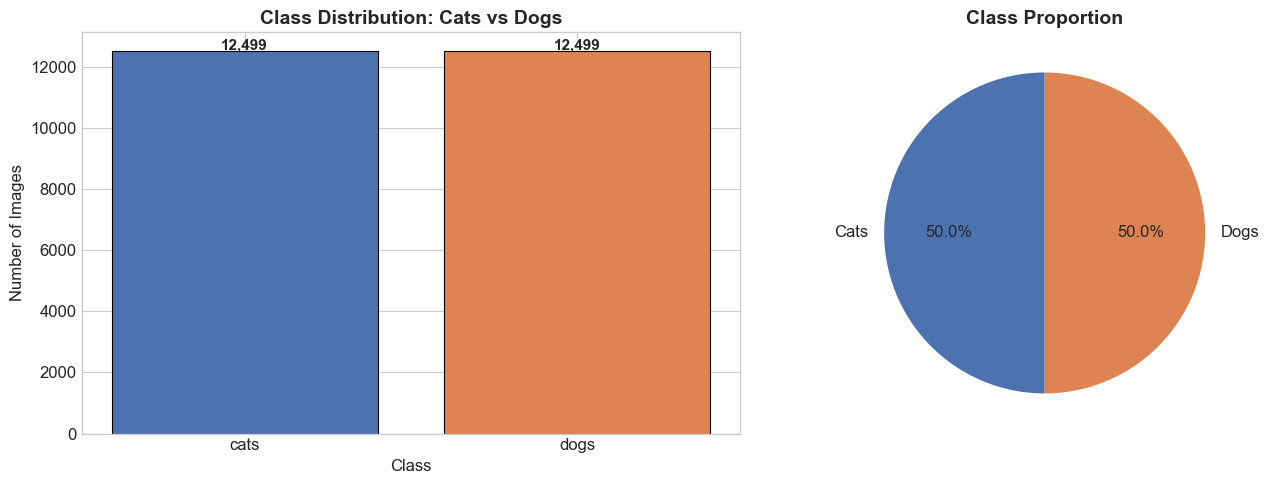

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['#4C72B0', '#DD8452']

# Bar chart
axes[0].bar(class_counts.keys(), class_counts.values(), color=colors, edgecolor='black', linewidth=0.8)
axes[0].set_title('Class Distribution: Cats vs Dogs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Images')
for i, (cls, cnt) in enumerate(class_counts.items()):
    axes[0].text(i, cnt + 50, f'{cnt:,}', ha='center', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(
    class_counts.values(),
    labels=[c.capitalize() for c in class_counts.keys()],
    autopct='%1.1f%%', colors=colors, startangle=90,
    textprops={'fontsize': 12}
)
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_class_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

### 3.2 Sample Images from the Dataset

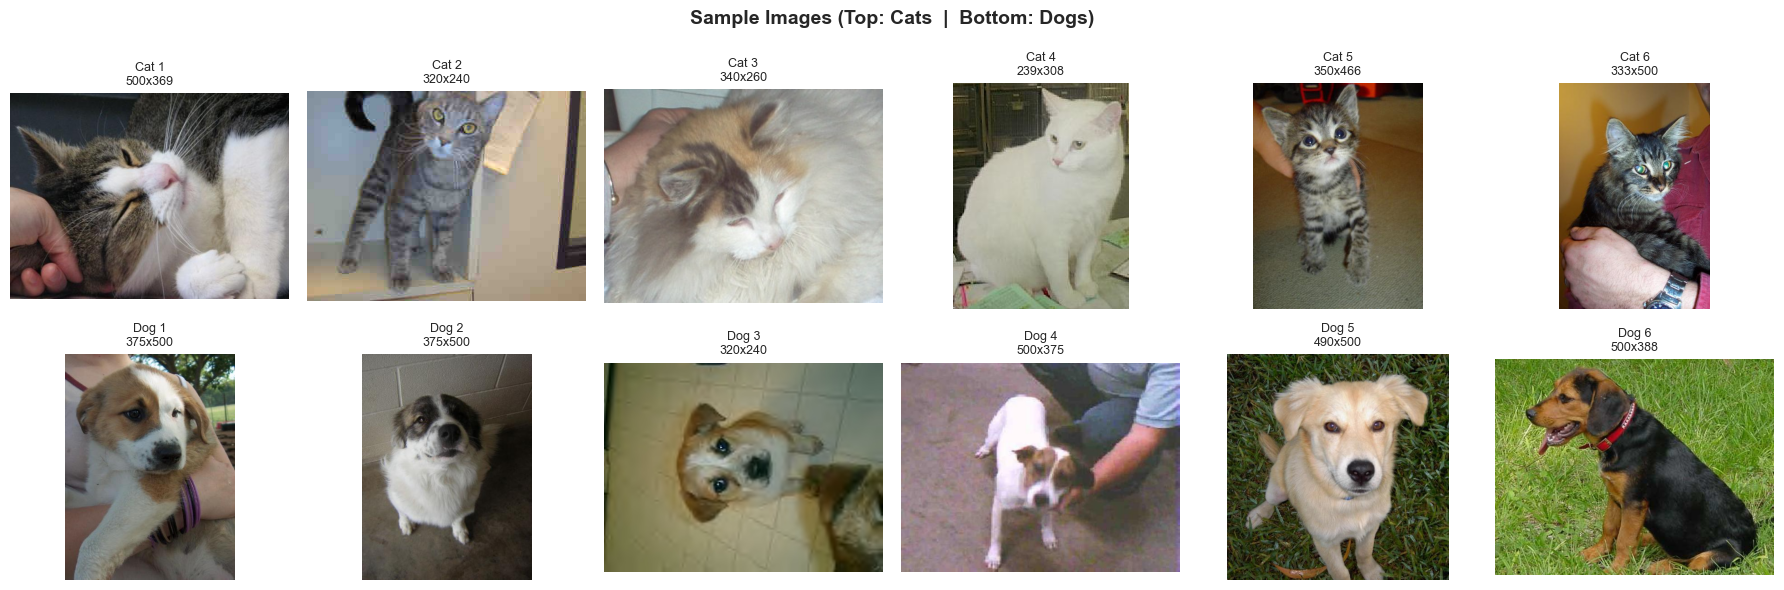

In [7]:
def load_valid_images(folder, n=6):
    files = glob.glob(os.path.join(folder, '*.*'))
    random.shuffle(files)
    valid = []
    for f in files:
        try:
            img = Image.open(f).convert('RGB')
            valid.append((f, img))
            if len(valid) == n:
                break
        except Exception:
            continue
    return valid

cat_samples = load_valid_images(os.path.join(RAW_DIR, 'cats'))
dog_samples = load_valid_images(os.path.join(RAW_DIR, 'dogs'))

fig, axes = plt.subplots(2, 6, figsize=(18, 6))
fig.suptitle('Sample Images (Top: Cats  |  Bottom: Dogs)', fontsize=14, fontweight='bold')

for i, (_, img) in enumerate(cat_samples):
    axes[0][i].imshow(img)
    axes[0][i].set_title(f'Cat {i+1}\n{img.size[0]}x{img.size[1]}', fontsize=9)
    axes[0][i].axis('off')

for i, (_, img) in enumerate(dog_samples):
    axes[1][i].imshow(img)
    axes[1][i].set_title(f'Dog {i+1}\n{img.size[0]}x{img.size[1]}', fontsize=9)
    axes[1][i].axis('off')

plt.tight_layout()
plt.savefig('eda_sample_images.png', dpi=100, bbox_inches='tight')
plt.show()

### 3.3 Image Dimension Analysis

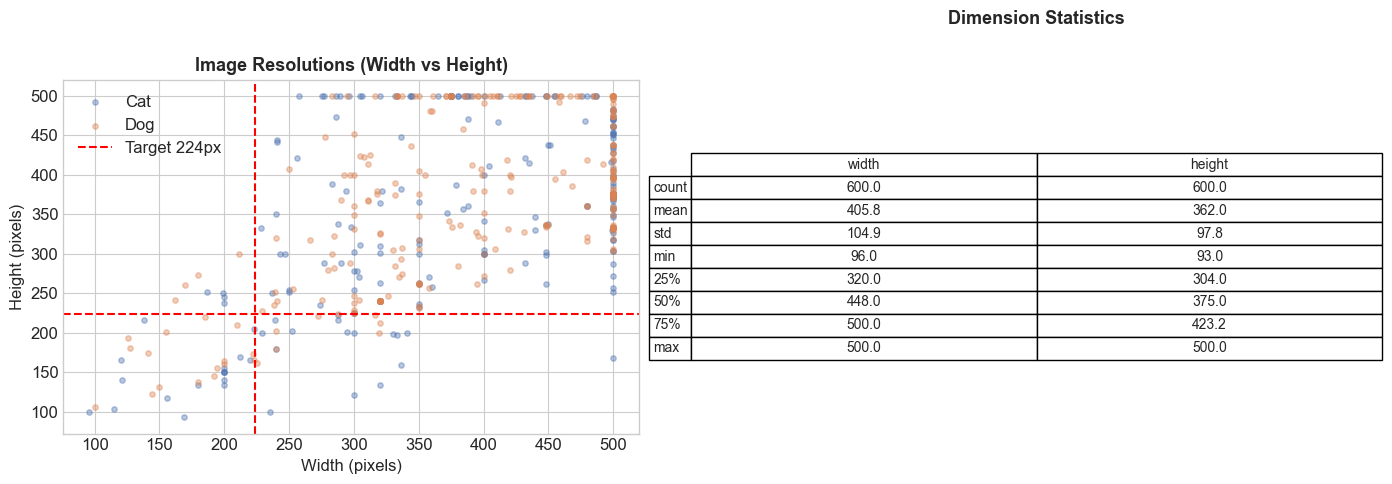

Analysed 600 images.


In [8]:
sample_files = (
    [(f, 'cat') for f in glob.glob(os.path.join(RAW_DIR, 'cats', '*.*'))[:300]] +
    [(f, 'dog') for f in glob.glob(os.path.join(RAW_DIR, 'dogs', '*.*'))[:300]]
)

widths, heights, lbls = [], [], []
for filepath, lbl in sample_files:
    try:
        with Image.open(filepath) as img:
            w, h = img.size
            widths.append(w); heights.append(h); lbls.append(lbl)
    except Exception:
        continue

df_dims = pd.DataFrame({'width': widths, 'height': heights, 'class': lbls})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cmap = {'cat': '#4C72B0', 'dog': '#DD8452'}

for cls, grp in df_dims.groupby('class'):
    axes[0].scatter(grp['width'], grp['height'], alpha=0.4, label=cls.capitalize(),
                    color=cmap[cls], s=15)
axes[0].axvline(224, color='red', linestyle='--', linewidth=1.5, label='Target 224px')
axes[0].axhline(224, color='red', linestyle='--', linewidth=1.5)
axes[0].set_title('Image Resolutions (Width vs Height)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Height (pixels)')
axes[0].legend()

stats = df_dims[['width', 'height']].describe().round(1)
axes[1].axis('off')
tbl = axes[1].table(cellText=stats.values, rowLabels=stats.index,
                     colLabels=stats.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.5)
axes[1].set_title('Dimension Statistics', fontsize=13, fontweight='bold', pad=40)

plt.tight_layout()
plt.savefig('eda_image_dimensions.png', dpi=100, bbox_inches='tight')
plt.show()
print(f"Analysed {len(df_dims)} images.")

## 4. Processed Dataset Split Overview

       cats  dogs  Total  % of Dataset
Split                                 
train  9999  9999  19998          80.0
val    1249  1249   2498          10.0
test   1251  1251   2502          10.0


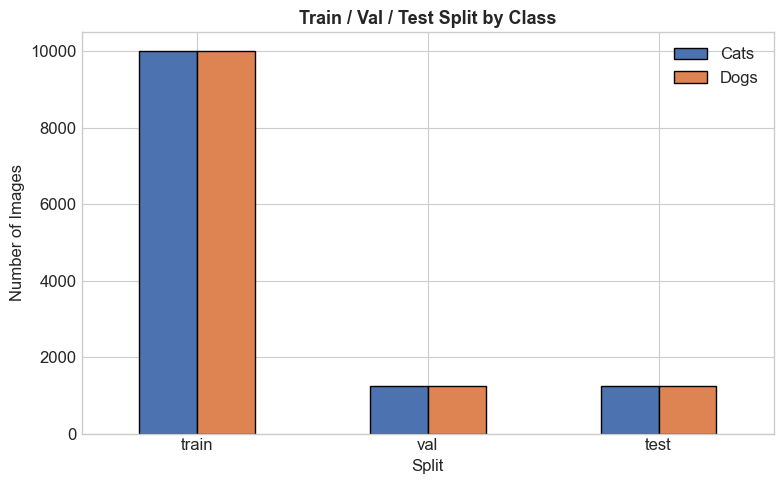

In [9]:
splits_data = {}
for split in ['train', 'val', 'test']:
    splits_data[split] = {}
    for cls in ['cats', 'dogs']:
        path = os.path.join(PROCESSED_DIR, split, cls)
        splits_data[split][cls] = len(glob.glob(os.path.join(path, '*.*'))) if os.path.exists(path) else 0

split_df = pd.DataFrame(splits_data).T
split_df.index.name = 'Split'
split_df['Total'] = split_df.sum(axis=1)
split_df['% of Dataset'] = (split_df['Total'] / split_df['Total'].sum() * 100).round(1)
print(split_df)

split_df[['cats', 'dogs']].plot(kind='bar', figsize=(8, 5), color=['#4C72B0', '#DD8452'],
                                 edgecolor='black')
plt.title('Train / Val / Test Split by Class', fontsize=13, fontweight='bold')
plt.xlabel('Split')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.legend(['Cats', 'Dogs'])
plt.tight_layout()
plt.savefig('eda_split_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

## 5. Summary of Findings

### Key Observations

| Observation | Finding |
|:---|:---|
| **Dataset Size** | 12,499 cats + 12,499 dogs = **24,998 total raw images** |
| **Class Balance** | Perfectly balanced — 50% cats, 50% dogs. No class imbalance issue. |
| **Image Variability** | Wide range of resolutions (from ~50×50 to >1,000×1,000 pixels) |
| **Preprocessing** | All images resized to **224×224 RGB** for standard CNN compatibility |
| **Data Quality** | Small number of truncated/corrupted images in the Kaggle dataset — skipped during load |
| **Train/Val/Test Split** | 80% / 10% / 10% applied per class to ensure balanced splits |

### Conclusions

1. The dataset is well-suited for binary classification — perfect class balance requires **no oversampling or class weighting**.
2. Large dimension variability confirms the importance of the 224×224 resize transformation.
3. Standard **ImageNet normalisation** (`mean=[0.485, 0.456, 0.406]`, `std=[0.229, 0.224, 0.225]`) is appropriate for CNN pre-training.
4. **Data augmentation** (random flips, colour jitter) will be applied during training to improve robustness.
5. A Simple CNN baseline achieves good starting results; **transfer learning** (ResNet-18/VGG-16) is the recommended next experiment, tracked via MLflow.